In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [84]:
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format


In [22]:
filename = '/content/drive/My Drive/DatosFrontendCafe/casos_covid19.csv' 
datos = pd.read_csv(filename, dtype={})  # leyendo datos

# Tip del día: ver bien cual es el separador 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,11,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [40]:
# datos.columns[10:14]
# datos.fallecido.unique()
datos.comuna.value_counts()


14    124678
13    120391
4     112358
1     109313
7     102999
12    100536
15     93302
3      92228
11     88872
5      88440
6      86937
8      83847
2      81593
9      74869
10     74412
Name: comuna, dtype: Int64

In [81]:
# pd.to_numeric(datos.comuna, downcast='integer', errors='ignore')
datos.comuna = datos.comuna.astype('Int64')
datos.edad = datos.edad.astype('Int64')

In [83]:
datos.edad

0          49
1          28
2          70
3          41
4          64
           ..
2528922    53
2528923    30
2528924    73
2528925    40
2528926    29
Name: edad, Length: 2523009, dtype: Int64

In [42]:
type(datos)

pandas.core.frame.DataFrame

In [5]:
df = pd.DataFrame(datos)   # Poniendolos en un dataframe

In [6]:
print(df.head())

   numero_de_caso  ...     tipo_contagio
0         2775791  ...  En Investigación
1         2775982  ...       Comunitario
2         2779533  ...       Comunitario
3         2779701  ...       Comunitario
4         2780180  ...       Comunitario

[5 rows x 14 columns]


In [44]:
print(f'Columnas: {list(df.columns)}')
print(f'Tamaño del dataframe {df.shape}')

Columnas: ['numero_de_caso', 'fecha_apertura_snvs', 'fecha_toma_muestra', 'fecha_clasificacion', 'provincia', 'barrio', 'comuna', 'genero', 'edad', 'clasificacion', 'fecha_fallecimiento', 'fallecido', 'fecha_alta', 'tipo_contagio']
Tamaño del dataframe (2528927, 14)


In [41]:
df.loc[0:2]  # Listando los primeros 3 elementos

,numero_de_caso,fecha_apertura_snvs,fecha_toma_muestra,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,fecha_alta,tipo_contagio
0,2775791,2020-09-21,2020-09-21,2020-09-22,CABA,BARRACAS,4.0,masculino,49.0,confirmado,NaT,NaN,2020-09-29,En Investigación
1,2775982,2020-09-21,2020-09-21,2020-09-21,CABA,FLORES,7.0,femenino,28.0,confirmado,NaT,NaN,2020-09-29,Comunitario
2,2779533,2020-09-21,2020-09-21,2020-09-21,Buenos Aires,NaN,NaN,femenino,70.0,confirmado,NaT,NaN,2020-09-29,Comunitario


In [9]:
pd.to_datetime('21SEP2020', format='%d%b%Y')
df.fecha_toma_muestra.type()

Timestamp('2020-09-21 00:00:00')

In [52]:
datos.fecha_apertura_snvs = pd.to_datetime(df.fecha_apertura_snvs, format='%d%b%Y:%H:%M:%S.%f') # Muy importante pegarle a todo el formato de la fecha
datos.fecha_toma_muestra = pd.to_datetime(df.fecha_toma_muestra, format='%d%b%Y:%H:%M:%S.%f')   # Ver si se puede hacer en menos lineas
datos.fecha_alta = pd.to_datetime(df.fecha_alta, format='%d%b%Y:%H:%M:%S.%f')
datos.fecha_clasificacion = pd.to_datetime(df.fecha_clasificacion, format='%d%b%Y:%H:%M:%S.%f')
datos.fecha_fallecimiento = pd.to_datetime(df.fecha_fallecimiento, format='%d%b%Y:%H:%M:%S.%f')


In [53]:
print(df.fecha_apertura_snvs)
print(datos.fecha_apertura_snvs) 

0         2020-09-21
1         2020-09-21
2         2020-09-21
3         2020-09-21
4         2020-09-21
             ...    
2528922   2020-09-08
2528923   2020-09-08
2528924   2020-09-08
2528925   2020-09-08
2528926   2020-09-08
Name: fecha_apertura_snvs, Length: 2528927, dtype: datetime64[ns]
0         2020-09-21
1         2020-09-21
2         2020-09-21
3         2020-09-21
4         2020-09-21
             ...    
2528922   2020-09-08
2528923   2020-09-08
2528924   2020-09-08
2528925   2020-09-08
2528926   2020-09-08
Name: fecha_apertura_snvs, Length: 2528927, dtype: datetime64[ns]


In [50]:
df.fecha_toma_muestra[10]

Timestamp('2020-09-21 00:00:00')

In [56]:
datos.fecha_toma_muestra.value_counts().tail()

2020-02-15    1
2020-02-29    1
2020-02-13    1
2020-01-25    1
2020-02-23    1
Name: fecha_toma_muestra, dtype: int64

In [57]:
# Para ver en que rango cubre este dataset
print(datos['fecha_toma_muestra'].min())   # guarda 1974?  posible error de tipeo Outlier
print(datos['fecha_toma_muestra'].max())

# Boxplot 

# Probando si  compara fech
datos.fecha_toma_muestra.describe()


1974-11-09 00:00:00
2021-05-27 00:00:00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                 2523273
unique                    520
top       2021-05-20 00:00:00
freq                    21714
first     1974-11-09 00:00:00
last      2021-05-27 00:00:00
Name: fecha_toma_muestra, dtype: object

In [61]:
# datos.fecha_fallecimiento[0]   # los NaN los transforma a NaT
# datos.fecha_fallecimiento.value_counts()


NaT

In [66]:
# datos.fecha_fallecimiento.dropna()  # inplace me lo remplaza

258       2020-09-21
845       2021-05-15
1579      2020-11-16
2881      2021-05-01
3147      2021-04-21
             ...    
2528261   2021-05-12
2528534   2021-05-08
2528537   2021-05-13
2528538   2021-05-04
2528830   2020-12-25
Name: fecha_fallecimiento, Length: 14743, dtype: datetime64[ns]

In [88]:
datos.edad.value_counts().tail(30).sum()/len(datos.edad) # ver criterio de edad para tirar

0.004695187373489353

In [71]:
datos = datos[datos.fecha_toma_muestra > "2020-03-01"]  #buscar fecha de inicio de testeos masivos
# datos[datos.fecha_toma_muestra == "2020-03-01"]


In [85]:
datos.edad.describe()

count   2522450.00
mean         39.31
std          18.59
min         -10.00
25%          26.00
50%          37.00
75%          51.00
max         221.00
Name: edad, dtype: float64

In [ ]:
datos.edad[datos]

In [14]:
print(f'Los tipos de contagio son {df.tipo_contagio.unique()}')
df.groupby(['tipo_contagio', 'provincia']).count()  # duda

Los tipos de contagio son ['En Investigación' 'Comunitario' 'Contacto' 'Trabajador de la Salud' nan
 'Importado']


numero_de_caso  ...  fecha_alta
tipo_contagio          provincia                            ...            
Comunitario            Buenos Aires                 216788  ...       13120
                       CABA                         291748  ...       28178
                       Catamarca                        68  ...           2
                       Chaco                           249  ...           8
                       Chubut                          774  ...          12
...                                                    ...  ...         ...
Trabajador de la Salud San Luis                          5  ...           0
                       Santa Fe                         11  ...           1
                       Santiago del Estero               1  ...           0
                       Tierra del Fuego                  2  ...           0
                       Tucumán                           3  ...           0

[100 rows x 12 columns]

In [15]:
print(f'Los genero {df.genero.unique()}')
df.groupby('genero').fallecido.count() 
# agrupo el dataframe por los que tienen mismo genero
# me fijo en la columna de fallecidos
 # nunique cuenta solo los que no son unicos

Los genero ['masculino' 'femenino' nan]


genero
femenino     6530
masculino    8213
Name: fallecido, dtype: int64

In [16]:
df.comuna.max()

15.0

         numero_de_caso fecha_apertura_snvs  ... fecha_alta     tipo_contagio
258             1923369          2020-08-16  ...        NaT       Comunitario
845            10519986          2021-04-16  ...        NaT  En Investigación
1579            4121135          2020-11-06  ...        NaT       Comunitario
2881           10260475          2021-04-12  ...        NaT          Contacto
3147            9419363          2021-03-29  ...        NaT       Comunitario
...                 ...                 ...  ...        ...               ...
2528261        11073768          2021-04-23  ...        NaT  En Investigación
2528534        10487055          2021-04-15  ...        NaT          Contacto
2528537        11709016          2021-05-04  ...        NaT       Comunitario
2528538        11733160          2021-05-04  ...        NaT       Comunitario
2528830         5546637          2020-12-23  ...        NaT       Comunitario

[14729 rows x 14 columns]
        provincia  comuna fallecido
8

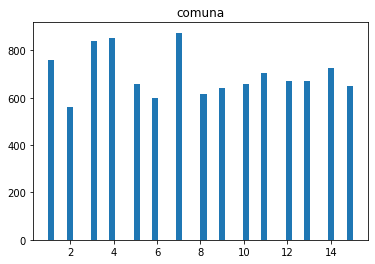

In [17]:


df_fallecidos = df.dropna(subset=['provincia','fallecido'])

print(df_fallecidos)
df_caba_fallecidos = df_fallecidos.filter(items= ['provincia','comuna', 'fallecido'])
df_caba_fallecidos = df_caba_fallecidos.loc[df['provincia'] == 'CABA']
print(df_caba_fallecidos)
histograma = df_caba_fallecidos.hist(bins=50)
plt.grid()
plt.show()